# Superstore Sales Analysis


## 1 - Problem Statement

•	The Superstore dataset provides sales and profit data for a variety of products across different categories and regions.


•	The goal of this project is to analyze the data and identify insights that can help the company improve its business performance.


•	Specifically, we aim to answer questions such as: which product categories are the most profitable? Which regions have the highest sales and profit? What are the most profitable products?


•	By answering these questions, we hope to provide recommendations for the company on how to optimize its product offerings and improve its revenue and profitability.



## 2 - Research questions

We’re interested in understanding which factors contribute to high sales in the superstore.

•	Which product categories have the highest profit margins in the Super Store?

•	Are there any significant differences in sales between the East region and other regions?

•	How do sales vary by product category during different months of the year?

•	What is the rate of returned products for orders with same-day shipping compared to other shipping options?

•	How do sales and profit vary by product category on weekdays compared to weekends?


## 3 - Formulate hypotheses

•	Hypothesis 1: Technology products have the highest profit margin compared to other product categories.

•	Hypothesis 2: The East region has the highest sales compared to other regions.

•	Hypothesis 3: Sales are higher during certain months of the year.

•	Hypothesis 4: Orders with same-day shipping have the lowest rate of returned products.

•	Hypothesis 5: The Company’s profit is more on weekdays than on weekends.



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv('superstore_dataset2011-2015.csv', encoding='ISO-8859-1')

# Explore the data

### 1. Display Top 5 Rows of The Dataset

In [9]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.000,106.140,35.460,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.100,36.036,9.720,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.000,29.640,8.170,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.500,-26.055,4.820,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.100,37.770,4.700,Medium


In [11]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

### 2. Check The Last 5 Rows of The Dataset

In [10]:
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.200,4.519,0.890,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.000,0.420,0.490,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.000,12.360,0.350,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.000,0.560,0.200,Medium
51289,36388,CA-2014-156720,31-12-2014,4/1/2015,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,...,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.200,-0.605,0.170,Medium


### 3. Find Shape of Our Dataset (numbers of rows and number of lines)

In [12]:
data.shape

(51290, 24)

In [14]:
print(f'Number of rows: {data.shape[0]}')
print(f'Number of lines: {data.shape[1]}')

Number of rows: 51290
Number of lines: 24


### 4. Get information about our dataset like total number of rows, columns, datatypes of each column and memory requirement

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

### 5. Check null values available in our dataset

In [19]:
data.isnull()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51286,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51287,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51288,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

### 6. Check for duplicate data and drop them

In [24]:
data.duplicated().any()

# In case duplicated().any() returned true, we could use data.duplicated().sum() to check and
# duplicated_rows = data[data.duplicated()] ---> print(duplicated_rows) to see exactly which ones are the duplicated rows

False

### 7. Get overall statistics about the dataset

In [25]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.000,9994.000,51290.000,51290.000,51290.000,51290.000,51290.000
mean,25645.500,55190.379,246.491,3.477,0.143,28.611,26.376
std,14806.292,32063.693,487.565,2.279,0.212,174.341,57.297
min,1.000,1040.000,0.444,1.000,0.000,-6599.978,0.000
25%,12823.250,23223.000,30.759,2.000,0.000,0.000,2.610
50%,25645.500,56430.500,85.053,3.000,0.000,9.240,7.790
75%,38467.750,90008.000,251.053,5.000,0.200,36.810,24.450
max,51290.000,99301.000,22638.480,14.000,0.850,8399.976,933.570


### 8. Drop unnecessary columns


In [26]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [28]:
data = data.drop(['Row ID', 'Order ID', 'Customer ID', 'Postal Code'], axis=1)

# axis = 1 to specify we're removing our columns

In [29]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

### Hypothesis 1: Technology products have the highest profit margin compared to other product categories.

In [33]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [65]:
cat_profit=data.groupby('Category')['Profit'].sum()

In [66]:
cat_profit

,Category,Profit
0,Furniture,285204.724
1,Office Supplies,518473.834
2,Technology,663778.733


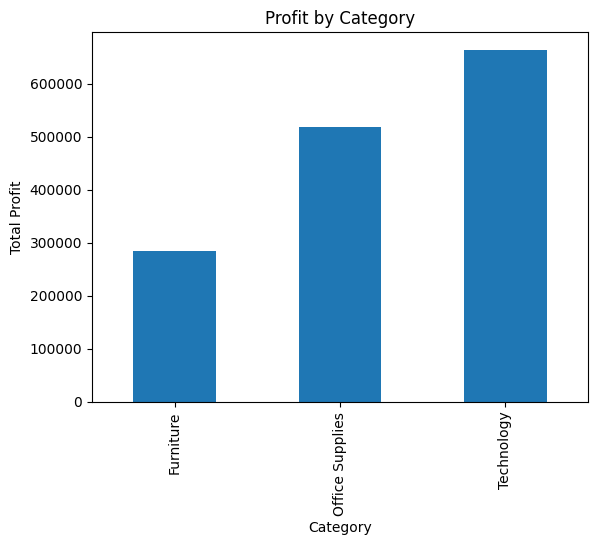

In [39]:
cat_profit.plot(kind='bar ')
plt.title('Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.show()

### Conclusion: The hypothesis is supported as technology products have the highest profit margin of the three categories.

### Hyphotesis 2: The East region has the highest sales compared to other regions.

In [45]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [61]:
reg_sales = data.groupby('Region')['Sales'].sum()

In [64]:
reg_sales

,Region,Sales
0,Africa,783773.211
1,Canada,66928.170
2,Caribbean,324280.861
3,Central,2822302.520
4,Central Asia,752826.567
5,EMEA,806161.311
6,East,678781.240
7,North,1248165.603
8,North Asia,848309.781
9,Oceania,1100184.612


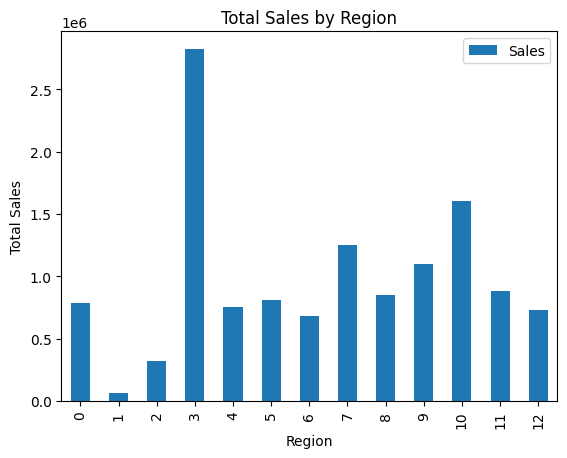

In [62]:

reg_sales.plot(kind='bar')
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()

### Conclusion: The hypothesis 2 is not supported as the central region has the highest sales.

### Hypothesis 3: Sales are higher during certain months of the year

In [51]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [54]:
data['Order Month'] = pd.DatetimeIndex(data['Order Date']).month

In [55]:
data.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Month
0,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.000,106.140,35.460,Medium,1
1,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.100,36.036,9.720,Medium,1
2,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.000,29.640,8.170,High,1
3,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.500,-26.055,4.820,High,1
4,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.100,37.770,4.700,Medium,1


In [59]:
month_sales = data.groupby('Order Month')['Sales'].sum()

In [60]:
month_sales

,Order Month,Sales
0,1,775766.912
1,2,722853.169
2,3,951333.085
3,4,851617.321
4,5,976415.681
5,6,1152367.788
6,7,838743.556
7,8,1247500.805
8,9,1244139.726
9,10,1120777.468


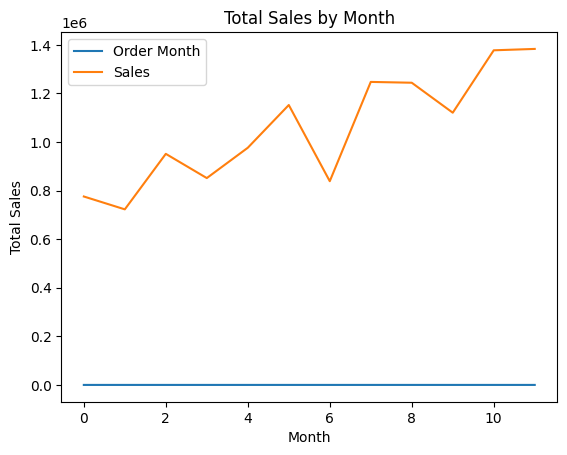

In [67]:
month_sales.plot(kind='line')
plt.title("Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

### Conclusion: Out hypothesis is supported as sales are higher during certain months of the year.

### Hypothesis 4: Orders with same-day shipping have the lowest rate of returned products.

In [68]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority', 'Order Month'],
      dtype='object')

In [69]:
total_orders_by_shipping_mode = data.groupby('Ship Mode').size()

In [70]:
total_orders_by_shipping_mode

Ship Mode
First Class        7505
Same Day           2701
Second Class      10309
Standard Class    30775
dtype: int64

In [72]:
returned_orders_by_shipping_mode = data[data['Profit']<0].groupby('Ship Mode').size()

In [73]:
returned_orders_by_shipping_mode

Ship Mode
First Class       1882
Same Day           646
Second Class      2482
Standard Class    7534
dtype: int64

In [74]:
returned_per_by_shipping_mode = (returned_orders_by_shipping_mode/total_orders_by_shipping_mode)*100

In [75]:
returned_per_by_shipping_mode

Ship Mode
First Class      25.077
Same Day         23.917
Second Class     24.076
Standard Class   24.481
dtype: float64

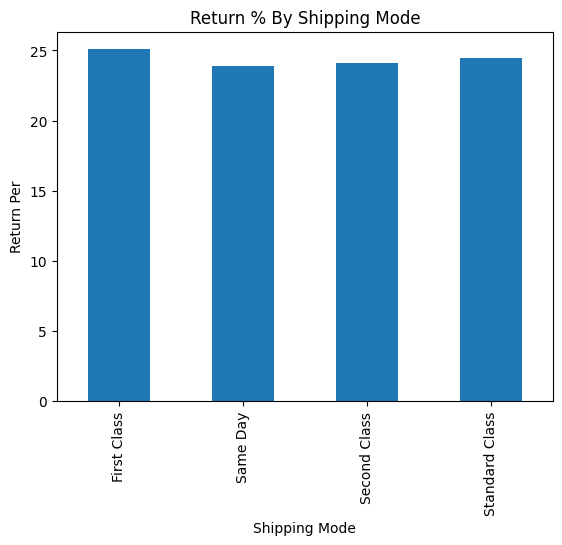

In [85]:
returned_per_by_shipping_mode.plot(kind='bar')
plt.title('Return % By Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Return Per')
plt.show()

### Conclusion: Our hypothesis is supported as orders with same day shipping have the lowest rate of returned products.

### Hypothesis 5: The company's profit is more on weekdays than on weekends

In [77]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority', 'Order Month'],
      dtype='object')

In [78]:
data['Order Day'] = pd.DatetimeIndex(data['Order Date']).day_name()

In [84]:
data.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Month,Order Day
0,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.000,106.140,35.460,Medium,1,Saturday
1,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.100,36.036,9.720,Medium,1,Saturday
2,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.000,29.640,8.170,High,1,Saturday
3,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.500,-26.055,4.820,High,1,Saturday
4,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.100,37.770,4.700,Medium,1,Saturday


In [87]:
day_profit = data.groupby('Order Day')['Profit'].sum()

In [88]:
day_profit

Order Day
Friday      243802.835
Monday      246526.557
Saturday    176486.552
Sunday      104117.907
Thursday    241183.080
Tuesday     249788.051
Wednesday   205552.309
Name: Profit, dtype: float64

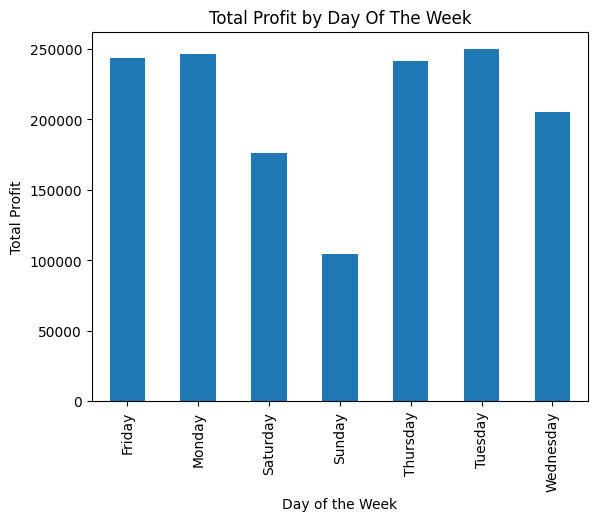

In [89]:
day_profit.plot(kind='bar')
plt.title('Total Profit by Day Of The Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Profit')
plt.show()


### Conclusion: Our hypothesis is supported as company's profit is higher on weekdays compared to weekends

# CONCLUSIONS

**Hypothesis 1: Technology products have the highest profit margin compared to other product categories.**

This hypothesis is supported. The data shows that technology products have the highest profit margin compared to other product categories.

**Hypothesis 2: The East region has the highest sales compared to other regions.**

This hypothesis is not supported. The data shows that the East region does not have the highest sales compared to other regions.

**Hypothesis 3: Sales are higher during certain months of the year.**

This hypothesis is supported. The data shows that sales are higher during certain months of the year.

**Hypothesis 4: Orders with same-day shipping have the lowest rate of returned products.**

This hypothesis is supported. The data shows that orders with same-day shipping have the lowest rate of returned products.

**Hypothesis 5: The Company's profit is more on weekdays than on weekends.**

This hypothesis is supported. The data shows that the company's profit is more on weekdays than on weekends.

# RESULTS

Based on the analysis, it can be concluded that technology products have the highest profit margin compared to other product categories.

The company's profit is higher on weekdays than on weekends. Sales are higher during certain months of the year.

Orders with same-day shipping have the lowest rate of returned products. However, the hypothesis that the East region has the highest sales compared to other regions is not supported by the data.

These conclusions provide valuable insights into the company's performance and can guide future decision-making processes.

**It is important to note that further investigation may be required to fully understand the underlying factors influencing these observations.**

# SUGGESTIONS

The company should focus on developing and promoting technology products to increase its profits. They could also consider reducing the production and promotion of products with lower profit margins.

Central region has the highest sales compared to other regions; the company could consider increasing its focus on this region. then the company should re-evaluate its marketing and sales strategies in other regions.

The company should focus on maximizing sales during the months of November and December. This could involve increasing the inventory of popular products during this time, running targeted marketing campaigns, and offering promotions or discounts to customers. However, the company should also consider strategies to maintain sales during other months, such as introducing new products or services or offering promotions and discounts during slower months.

The company could consider offering more same-day shipping options to customers. This might involve optimizing inventory and supply chain processes to ensure that products can be shipped quickly and efficiently.

The company could consider focusing on different types of promotions or sales during the weekends to increase sales. For example, the company could offer weekend-only promotions or discounts or run targeted marketing campaigns aimed at weekend shoppers. The company could also consider offering special events or activities in-store on weekends to attract customers and increase sales. Additionally, the company could focus on offering products and services that are particularly popular among weekend shoppers, such as home entertainment or outdoor products.